## Name- Vaibhav R. Gudulkar

# Assignment - Association Rules (my_movies.csv)

In [49]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [50]:
# Importing Dataset

movies = pd.read_csv('my_movies.csv')

In [51]:
movies.sample(5)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0


### Performing Basic EDA

In [7]:
movies.sum()

C:\Users\Vaibhav\AppData\Local\Temp/ipykernel_104012/2790600498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  movies.sum()


V1               Sixth SenseGladiatorLOTR1GladiatorGladiatorGla...
V2               LOTR1PatriotLOTR2PatriotPatriotPatriotHarry Po...
Sixth Sense                                                      6
Gladiator                                                        7
LOTR1                                                            2
Harry Potter1                                                    2
Patriot                                                          6
LOTR2                                                            2
Harry Potter2                                                    1
LOTR                                                             1
Braveheart                                                       1
Green Mile                                                       2
dtype: object

In [8]:
movies.shape

(10, 15)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [11]:
movies_x = movies.drop(movies.columns[5:16],axis=1)
movies_x.fillna('null',inplace=True)
movies_x

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,null,null
2,LOTR1,LOTR2,null,null,null
3,Gladiator,Patriot,Sixth Sense,null,null
4,Gladiator,Patriot,Sixth Sense,null,null
5,Gladiator,Patriot,Sixth Sense,null,null
6,Harry Potter1,Harry Potter2,null,null,null
7,Gladiator,Patriot,null,null,null
8,Gladiator,Patriot,Sixth Sense,null,null
9,Sixth Sense,LOTR,Gladiator,Green Mile,null


In [12]:
# Conversion of DataFrame to List

movies_list = movies_x.to_numpy().tolist()
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'null', 'null'],
 ['LOTR1', 'LOTR2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Harry Potter1', 'Harry Potter2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'null']]

In [15]:
# Removing the Null Values

j=len(movies_list)
i=0
while i < j:
    while 'null' in movies_list[i]:
        movies_list[i].remove('null')
    i+=1

In [16]:
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [20]:
# Storing the above list into all_movies_list variable

all_movies_list = [movie for transaction in movies_list for movie in transaction]
print(all_movies_list)
len(all_movies_list)

['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2', 'Gladiator', 'Patriot', 'Braveheart', 'LOTR1', 'LOTR2', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Harry Potter1', 'Harry Potter2', 'Gladiator', 'Patriot', 'Gladiator', 'Patriot', 'Sixth Sense', 'Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']


30

In [21]:
from collections import Counter
from collections import OrderedDict

movie_frequency=Counter(all_movies_list)
print("Old data",movie_frequency)

movie_frequency=sorted(movie_frequency.items(), key = lambda x:x[1]) 
print("\nSorted Data:\n",movie_frequency)

#Split Items and their frequency
frequencies = list(reversed([i[1] for i in movie_frequency]))
movies = list(reversed([i[0] for i in movie_frequency]))

print("\n Movie List:",movies)
print("\n Movie Frequency",frequencies)

Old data Counter({'Gladiator': 7, 'Sixth Sense': 6, 'Patriot': 6, 'LOTR1': 2, 'Harry Potter1': 2, 'Green Mile': 2, 'LOTR2': 2, 'Braveheart': 1, 'Harry Potter2': 1, 'LOTR': 1})

Sorted Data:
 [('Braveheart', 1), ('Harry Potter2', 1), ('LOTR', 1), ('LOTR1', 2), ('Harry Potter1', 2), ('Green Mile', 2), ('LOTR2', 2), ('Sixth Sense', 6), ('Patriot', 6), ('Gladiator', 7)]

 Movie List: ['Gladiator', 'Patriot', 'Sixth Sense', 'LOTR2', 'Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR', 'Harry Potter2', 'Braveheart']

 Movie Frequency [7, 6, 6, 2, 2, 2, 2, 1, 1, 1]


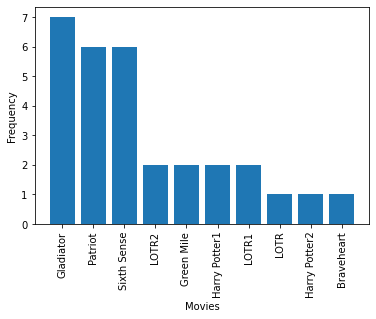

In [23]:
#Visualizing the data using graph

import matplotlib.pyplot as plt

plt.bar (movies,frequencies)
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [24]:
#Creating a dataframe

movie_series  = pd.DataFrame(pd.Series(movies_list))
movie_series.columns = ["Movie_Series"]
print(movie_series)

                                        Movie_Series
0  [Sixth Sense, LOTR1, Harry Potter1, Green Mile...
1                   [Gladiator, Patriot, Braveheart]
2                                     [LOTR1, LOTR2]
3                  [Gladiator, Patriot, Sixth Sense]
4                  [Gladiator, Patriot, Sixth Sense]
5                  [Gladiator, Patriot, Sixth Sense]
6                     [Harry Potter1, Harry Potter2]
7                               [Gladiator, Patriot]
8                  [Gladiator, Patriot, Sixth Sense]
9         [Sixth Sense, LOTR, Gladiator, Green Mile]


In [25]:
X = movie_series['Movie_Series'].str.join(sep='*')
print(X)

# create dummy variable
X= X.str.get_dummies(sep='*')
X

0    Sixth Sense*LOTR1*Harry Potter1*Green Mile*LOTR2
1                        Gladiator*Patriot*Braveheart
2                                         LOTR1*LOTR2
3                       Gladiator*Patriot*Sixth Sense
4                       Gladiator*Patriot*Sixth Sense
5                       Gladiator*Patriot*Sixth Sense
6                         Harry Potter1*Harry Potter2
7                                   Gladiator*Patriot
8                       Gladiator*Patriot*Sixth Sense
9               Sixth Sense*LOTR*Gladiator*Green Mile
Name: Movie_Series, dtype: object


,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [26]:
# Association rule Mining

frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

# Most Frequent item sets based on support in decending order
frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Patriot, Gladiator)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Sixth Sense, Gladiator)


In [27]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
20,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
123,(LOTR1),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
40,"(LOTR1, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
41,(Harry Potter1),"(LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
30,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


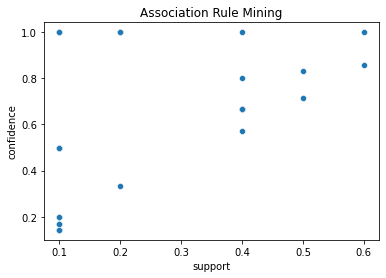

In [28]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


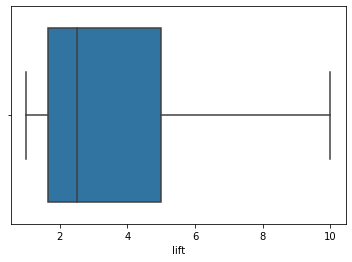

In [36]:
# Box Plot
sns.boxplot(rules['lift'], data=rules)
plt.show()


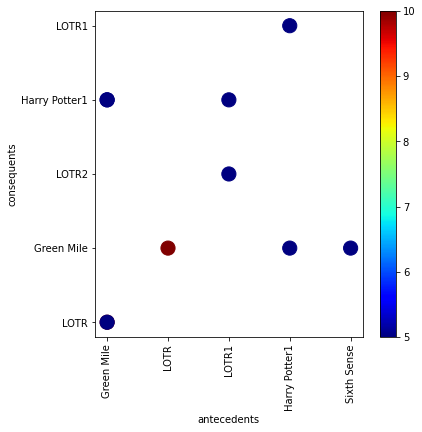

In [47]:
X1 = rules.antecedents.iloc[0:10]
Y1 = rules.consequents.iloc[0:10]
Z1 = rules.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [40]:
B = movie_series['Movie_Series'].str.join(sep='*')
# now each transaction is like:  fruit*yogurt*cream cheese *meat spreads
# print(X)

# create dummy variable for each 
B= B.str.get_dummies(sep='*')
B

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [42]:
#Association rule with support = .002

frequent_movies1 = apriori(B, min_support=0.002, max_len=2,use_colnames = True)
print("Raw Data:\n",frequent_movies1.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)


In [43]:
# Most Frequent item sets based on support in decending order

frequent_movies1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies1.head())


Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
8       0.6                 (Patriot)
14      0.6      (Patriot, Gladiator)
9       0.6             (Sixth Sense)
15      0.5  (Sixth Sense, Gladiator)


In [44]:
rules1 = association_rules(frequent_movies1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
23,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
22,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
17,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
14,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
24,(Harry Potter1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
21,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
20,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


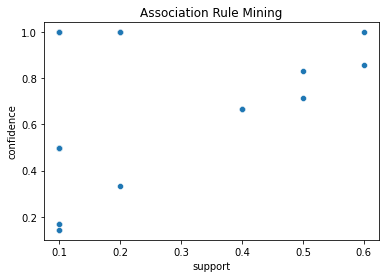

In [45]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

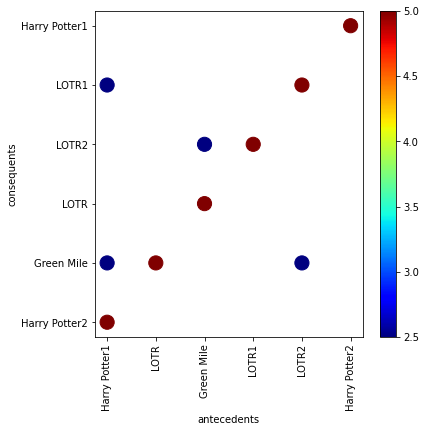

In [46]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()